In [1]:
!git clone https://github.com/ssanderson/pydata-toolbox

fatal: destination path 'pydata-toolbox' already exists and is not an empty directory.


In [2]:
pip install -U fortran-magic

In [3]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
x = ['uno',2.0,3,'cuatro',5.0,6]
x

['uno', 2.0, 3, 'cuatro', 5.0, 6]

In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [9]:
primero = x[0]
segundo = x[1]
print(f'Primero: {primero}')
print(f'Segundo: {segundo}')

Primero: uno
Segundo: 2.0


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
ultimo = x[-1]
penult = x[-2]
print(f'Último: {ultimo}')
print(f'Penúltimo: {penult}')

Último: 6
Penúltimo: 5.0


In [12]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [13]:
sublista = x[2:5]
sublista

[3, 'cuatro', 5.0]

In [14]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [15]:
primeros2= x[:2]
primeros2

['uno', 2.0]

In [16]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [17]:
despues4 = x[4:]
despues4

[5.0, 6]

In [18]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [19]:
x= [1,2,3,4,5,6,7]
x[::2]

[1, 3, 5, 7]

In [20]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [21]:
x[::-1]

[7, 6, 5, 4, 3, 2, 1]

In [22]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [23]:
x
print('Antes: ',x)
x.append('ocho')
print('Después: ', x)
x.remove('ocho')

Antes:  [1, 2, 3, 4, 5, 6, 7]
Después:  [1, 2, 3, 4, 5, 6, 7, 'ocho']


In [24]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [25]:

print(x)
[y**2 for y in x]

[1, 2, 3, 4, 5, 6, 7]


[1, 4, 9, 16, 25, 36, 49]

# Dictionaries

In [26]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [27]:
cantantes= {'Bad':'Bunny', 'Justin':'Bieber','Juan Luis':'Guerra'}
cantantes

{'Bad': 'Bunny', 'Juan Luis': 'Guerra', 'Justin': 'Bieber'}

In [28]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [29]:
cantantes['Romeo']= 'Santos'
cantantes

{'Bad': 'Bunny', 'Juan Luis': 'Guerra', 'Justin': 'Bieber', 'Romeo': 'Santos'}

In [30]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [31]:
del cantantes['Justin']
cantantes

{'Bad': 'Bunny', 'Juan Luis': 'Guerra', 'Romeo': 'Santos'}

In [32]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
cantantes['Romeo':'Bad']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [33]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [34]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [35]:
x=[[2,2,2],[1,1,1],[2,1,2]]
y=[[1,2],[2,2],[2,1]]

def multM(a,b):
  filas= len(a)
  colum= len(b[0])
  salida=[[0 for cols in range(colum)] for fila in range(filas)]

  for i in range(filas):
    for j in range(colum):
      for k in range(len(b)):
        salida[i][j] += a[i][k] * b[k][j]
  return salida

In [36]:
%%time

matmul(a, b)

CPU times: user 22 µs, sys: 4 µs, total: 26 µs
Wall time: 28.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [37]:
%%time
multM(x,y)

CPU times: user 25 µs, sys: 5 µs, total: 30 µs
Wall time: 33.6 µs


[[10, 10], [5, 5], [8, 8]]

In [38]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9292229185795384, 0.44542423164910727, 0.1282817166387651],
 [0.3817506606728872, 0.6425221178277196, 0.3649464876051959]]

In [39]:
import random
def ranM(a,b):
  salida=[]
  for fila in range(a):
    salida.append([random.random() for colum in range(b)])
  return salida
rand= ranM(2,2)
rand

[[0.07076997858512879, 0.5965570006736044],
 [0.6762567859115942, 0.9277743988890994]]

In [40]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.6 s, sys: 49.1 ms, total: 10.7 s
Wall time: 10.7 s


In [41]:
%%time
x= ranM(10,5)
y= ranM(5,10)
z = multM(x,y)

CPU times: user 4.21 ms, sys: 1.01 ms, total: 5.22 ms
Wall time: 5.89 ms


In [42]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [43]:
def pxp(x,y):
  return sum(a*b for a,b in zip(x,y))

In [44]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [45]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [46]:
lista = [float(i) for i in range(10000)]
array = np.array(lista)


In [47]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.5 ms, sys: 977 µs, total: 11.5 ms
Wall time: 11.8 ms


333328333350000.0

In [48]:
%%time
pxp(lista,lista)

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.78 ms


333283335000.0

In [49]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 183 µs, sys: 9 µs, total: 192 µs
Wall time: 221 µs


333328333350000.0

In [50]:
%%time
fortran_dot_product(array, array)

CPU times: user 0 ns, sys: 45 µs, total: 45 µs
Wall time: 71.5 µs


333283335000.0

## Why is the Python Version so Much Slower?

In [51]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [52]:
def multi(a, b):
    return [x*y for x, y in zip(a, b)]

multi([10, 5, 3.0, 4], ['uno', 2 + 2j, 3, 4])

['unounounounounounounounounouno', (10+10j), 9.0, 16]

In [53]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [54]:
source_code = 'x*y/z'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                2 (z)
              8 BINARY_TRUE_DIVIDE
             10 RETURN_VALUE


# What Do We Do?

In [72]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [56]:
lista = np.array([2,4,6,8])
lista

array([2, 4, 6, 8])

In [57]:
data + data

array([2, 4, 6, 8])

In [58]:
lista * lista

array([ 4, 16, 36, 64])

In [59]:
lista*2

array([ 4,  8, 12, 16])

In [60]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 138 µs, sys: 962 µs, total: 1.1 ms
Wall time: 1.3 ms


333328333350000.0

In [61]:
%%time
(array* array).sum()

CPU times: user 266 µs, sys: 13 µs, total: 279 µs
Wall time: 432 µs


333283335000.0

In [62]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.35 ms, sys: 3.06 ms, total: 4.41 ms
Wall time: 5.13 ms


333328333350000.0

In [63]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 757 µs, sys: 0 ns, total: 757 µs
Wall time: 935 µs


333328333350000.0

In [64]:
%%time
fortran_dot_product(array, array)

CPU times: user 0 ns, sys: 31 µs, total: 31 µs
Wall time: 35 µs


333283335000.0

In [73]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [66]:
lista[0]= 'uno'

ValueError: ignored

In [74]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [68]:
lista.append(3)

AttributeError: ignored

In [69]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [70]:
x2= lista.reshape(2,2)
x2

array([[2, 4],
       [6, 8]])

# What's in an Array?

In [75]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [76]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(3, 2)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2]
 [3 4]
 [5 6]]
DType: int16
Shape: (3, 2)
Strides: (4, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [77]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
lista= np.arange(15).reshape(3,5)
lista

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [80]:
lista * lista

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [81]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [82]:
np.log(lista)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436],
       [1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458],
       [2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733]])

In [83]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [84]:
(lista%2) ==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

In [85]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [86]:
((lista / 2) > 0) & ((lista % 2) == 0)

array([[False, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]])

In [87]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [88]:
lista@lista.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# Selections

We often want to perform an operation on just a subset of our data.

In [89]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [90]:
senos = np.sin(np.linspace(0, 3.14, 5))
cosenos = np.cos(np.linspace(0, 3.14, 5))
senos

array([0.        , 0.70682518, 0.99999968, 0.70795091, 0.00159265])

In [91]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [92]:
senos[0]

0.0

In [93]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [94]:
senos[:4]

array([0.        , 0.70682518, 0.99999968, 0.70795091])

In [95]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [96]:
senos[2:]

array([0.99999968, 0.70795091, 0.00159265])

In [97]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [98]:
senos[::2]

array([0.        , 0.99999968, 0.00159265])

In [99]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [100]:
print(f'Senos: {senos}')
print(f'Senos > 0.7: {senos>0.7}')
print(f'Senos[senos > 0.7]: {senos[senos > 0.7]}')

Senos: [0.         0.70682518 0.99999968 0.70795091 0.00159265]
Senos > 0.7: [False  True  True  True False]
Senos[senos > 0.7]: [0.70682518 0.99999968 0.70795091]


In [101]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [102]:
print(senos)
senos[[0,1,4]]

[0.         0.70682518 0.99999968 0.70795091 0.00159265]


array([0.        , 0.70682518, 0.00159265])

In [103]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [104]:
lista2= np.array([1,56,-7,3,-2])

In [105]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [106]:
index_lista2 = np.argsort(lista2)
index_lista2

array([2, 4, 0, 3, 1])

In [107]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [108]:
lista2[index_lista2]

array([-7, -2,  1,  3, 56])

In [109]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [110]:
x3 = np.array([15,4,33,5])
x4 = np.array(['a','b','c','d'])

In [111]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [112]:
ordenx3= np.argsort(x3)
x4[ordenx3]

array(['b', 'd', 'a', 'c'], dtype='<U1')

In [113]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [114]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [115]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [116]:
lista = np.arange(16).reshape(4,4)
lista

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [117]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [118]:
lista[:2,3:]

array([[3],
       [7]])

In [119]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [120]:
lista[:3,[-1,-2]]

array([[ 3,  2],
       [ 7,  6],
       [11, 10]])

In [121]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [122]:
lista[(lista[0, :] % 2) == 0]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [123]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [124]:
variance(np.random.standard_normal(1000))

1.033524762222511

In [125]:
variance(np.random.standard_normal(100))

1.1598826066173555

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [126]:
data = np.arange(30)
data.mean()

14.5

In [127]:
lista = np.arange(15)
lista.mean()

7.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [128]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [129]:
lista = np.arange(20).reshape(4,5)
lista

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [130]:
data.mean()

14.5

In [131]:
lista.mean()

9.5

In [132]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [133]:
lista.mean(axis=0)

array([ 7.5,  8.5,  9.5, 10.5, 11.5])

In [134]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [135]:
lista.mean(axis=1)

array([ 2.,  7., 12., 17.])

# Broadcasting

In [136]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [137]:
fila = np.array([2, 4, 6, 8])
colu = np.array([[2], [4], [6]])
print("Row:", row, sep=' // ')
print("Column:", column, sep='//')

Row: // [1 2 3 4]
Column://[[1]
 [2]
 [3]]


In [138]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [139]:
fila + colu

array([[ 4,  6,  8, 10],
       [ 6,  8, 10, 12],
       [ 8, 10, 12, 14]])

In [140]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [141]:
print("Lista: ", lista, sep='-')
print("Mean: ", lista.mean(axis=0), sep='-')
print("Lista - Mean: ", lista + lista.mean(axis=0), sep='-')

Lista: -[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Mean: -[ 7.5  8.5  9.5 10.5 11.5]
Lista - Mean: -[[ 7.5  9.5 11.5 13.5 15.5]
 [12.5 14.5 16.5 18.5 20.5]
 [17.5 19.5 21.5 23.5 25.5]
 [22.5 24.5 26.5 28.5 30.5]]


# Selection in Pandas

In [142]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [143]:
x = pd.Series(index=['A', 'B', 'C', 'D'], data=[1, 2, 3, 4])
x

A    1
B    2
C    3
D    4
dtype: int64

In [144]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [145]:
print("Indexes: ", x.index)
print("Valores: ", x.values)

Indexes:  Index(['A', 'B', 'C', 'D'], dtype='object')
Valores:  [1 2 3 4]


In [146]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [147]:
x.iloc[2]

3

In [148]:
# ... or by label.
s.loc['a']

1

In [149]:
x.loc['C']

3

In [150]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [151]:
x.iloc[:1]

A    1
dtype: int64

In [152]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [153]:
x.loc[:'D']

A    1
B    2
C    3
D    4
dtype: int64

In [154]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [155]:
x.iloc[[-1,-2]]

D    4
C    3
dtype: int64

In [156]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [157]:
x.loc[x>1]

B    2
C    3
D    4
dtype: int64

In [158]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [159]:
x2= pd.Series({'A':1.0,'B':2.0, 'C':3.0, 'f':4.0})
x2

A    1.0
B    2.0
C    3.0
f    4.0
dtype: float64

In [160]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [161]:
x + x2

A    2.0
B    4.0
C    6.0
D    NaN
f    NaN
dtype: float64

In [162]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [163]:
(x+x2).fillna(0.0)

A    2.0
B    4.0
C    6.0
D    0.0
f    0.0
dtype: float64

In [166]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-20,116.199997,118.980003,115.629997,117.510002,116.759026,124423700
2020-10-21,116.669998,118.709999,116.449997,116.870003,116.123116,89946000
2020-10-22,117.449997,118.040001,114.589996,115.750000,115.010277,101988000
2020-10-23,116.389999,116.550003,114.279999,115.040001,114.304810,82572600
2020-10-26,114.010002,116.550003,112.879997,115.050003,114.314743,111850700


In [167]:
tsla = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col='Date')
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
2020-10-22,441.920013,445.230011,424.510010,425.790009,425.790009,39993200
2020-10-23,421.839996,422.890015,407.380005,420.630005,420.630005,33717000
2020-10-26,411.630005,425.760010,410.000000,420.279999,420.279999,28239200


In [168]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2020-10-20,116.199997,118.980003
2020-10-21,116.669998,118.709999


In [169]:
tsla.iloc[:3, :1]

,Open
Date,
2020-10-20,431.750000
2020-10-21,422.700012
2020-10-22,441.920013


In [170]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


In [171]:
tsla.loc[pd.Timestamp('2020-10-20'):pd.Timestamp('2020-10-23'), ['Open', 'Volume']]

,Open,Volume
Date,,
2020-10-20,431.750000,31656300
2020-10-21,422.700012,32370500
2020-10-22,441.920013,39993200
2020-10-23,421.839996,33717000


# Rolling Operations

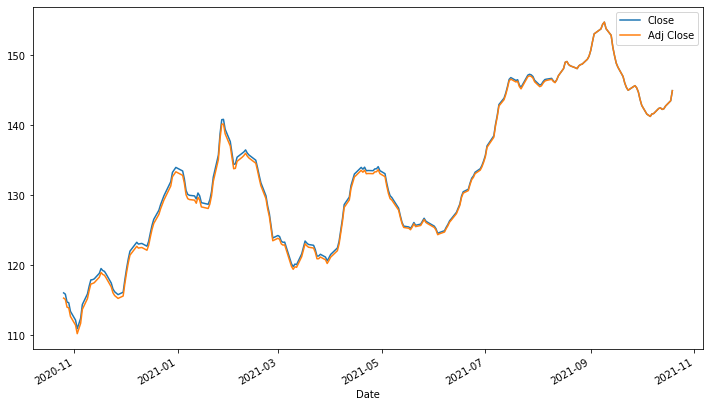

In [172]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

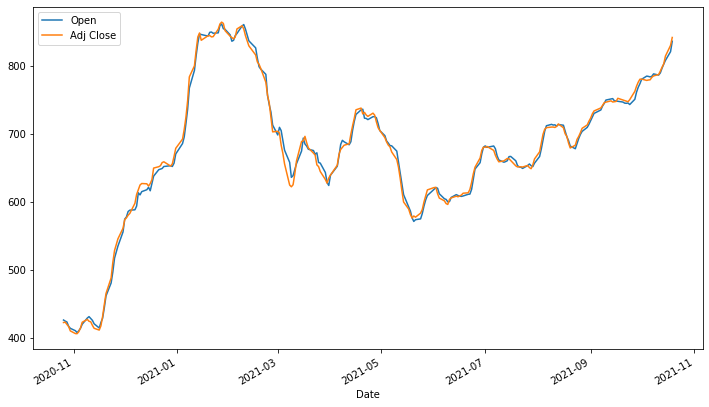

In [173]:
tsla.rolling(5)[['Open', 'Adj Close']].mean().plot();

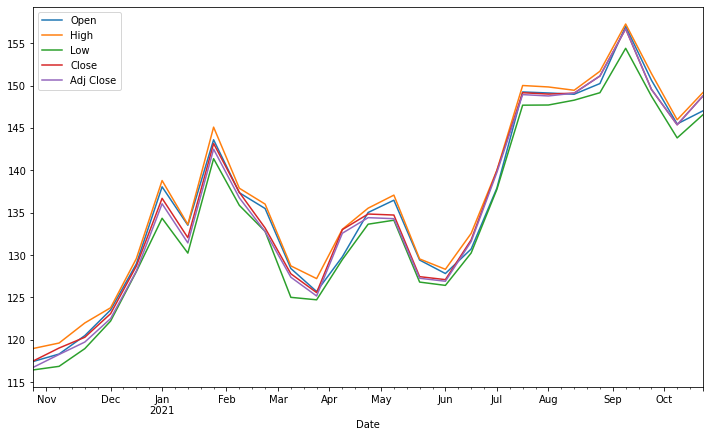

In [174]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

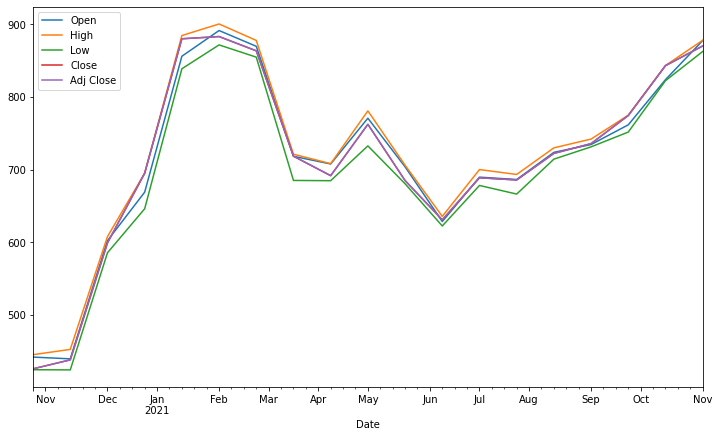

In [175]:
tsla.drop('Volume', axis=1).resample('3W').max().plot();

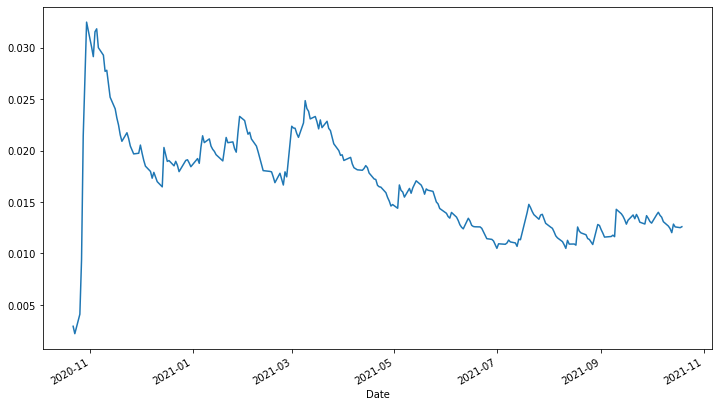

In [176]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

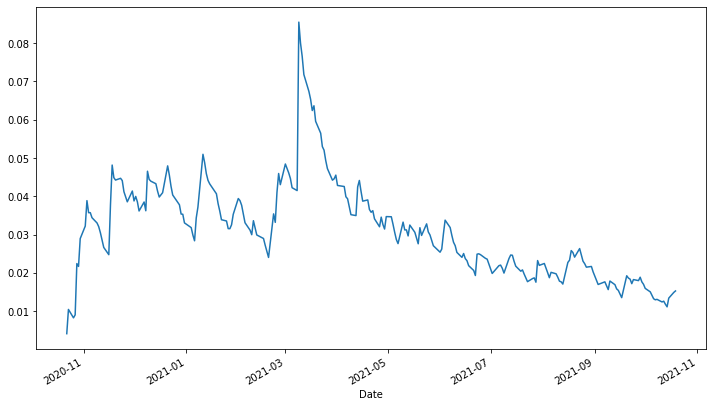

In [177]:
tsla['Close'].pct_change().ewm(span=15).std().plot();

# "Real World" Data

In [179]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);